In [1]:
#We import the necessary libraries.
%matplotlib inline

In [2]:
import os

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from importlib import reload
import seaborn as sns

In [4]:
from matplotlib import rcParams

#We change the formatting of the plots.
    #rcParams["axes.formatter.useoffset"] = False => Disabling the automatic offset for tick labels, since its False
#full numbers will be displayed.
    #rcParams['axes.formatter.limits'] = -15,15 => If the tick labels are outside of range (-15, 15) Matplotlib will
#use Scientific Notation.
    #rcParams['mathtext.fontset'] = 'stix' => "STIX" font will be used for mathematical symbols, this font is used 
#in publications.
    #rcParams['font.family'] = 'STIXGeneral' => "STIXGeneral" is a part of the font family, ensures the text and
#labels also use this font.
    #rcParams['xtick.direction']='in' => This changes the direction of the x-axis tick marks to point inward,
#towards the plot area.
    #rcParams['ytick.direction']='in' => This changes the direction of the y-axis tick marks to point inward,
#towards the plot area.
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'

#import sys
#sys.path.pop(0)

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [5]:
#We import the result from the Planet Injections.
df_300 = pd.read_csv("../../notebooks/toi2431-analysis/df_planet_300_2sigma.csv")
df_1200 = pd.read_csv("../../notebooks/toi2431-analysis/df_planet_1200_2sigma.csv")
df = pd.concat([df_300, df_1200], ignore_index = True)
#df = df_300

df

,Planet 1,P_b (days),T0_b,ecc_b,omega_b (rad),K_b (m/s),Planet 2,P_c (days),T0_c,ecc_c,omega_c (rad),K_c (m/s),K_truth (m/s),K_fit (m/s),Result,K_fit Lower Error,K_fit Upper Error
0,TOI-2431 b,0.224196,2.460259e+06,0,1.570796,23.788589,TOI-2431 c,77.913833,-29.952991,0,1.570796,11.998034,23.788589,28.129638,Recovered,2.568762,2.221770
1,TOI-2431 b,0.224196,2.460259e+06,0,1.570796,40.885752,TOI-2431 c,85.801632,-26.399512,0,1.570796,3.223407,40.885752,40.545468,Recovered,1.709610,1.552398
2,TOI-2431 b,0.224197,2.460259e+06,0,1.570796,44.813525,TOI-2431 c,19.061200,-6.665122,0,1.570796,37.974576,44.813525,43.825778,Recovered,2.665140,2.385929
3,TOI-2431 b,0.224195,2.460259e+06,0,1.570796,28.447416,TOI-2431 c,97.918244,47.070112,0,1.570796,45.847951,28.447416,27.724990,Recovered,2.295261,2.466535
4,TOI-2431 b,0.224195,2.460259e+06,0,1.570796,41.120033,TOI-2431 c,90.405812,43.946538,0,1.570796,42.196771,41.120033,41.205941,Recovered,2.134718,2.320371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,TOI-2431 b,0.224196,2.460259e+06,0,1.570796,35.543732,TOI-2431 c,22.463583,-0.180417,0,1.570796,37.340222,35.543732,35.258866,Recovered,2.138051,1.864084
1496,TOI-2431 b,0.224195,2.460259e+06,0,1.570796,38.006670,TOI-2431 c,85.710214,-28.074856,0,1.570796,17.077352,38.006670,38.861687,Recovered,1.711343,1.705620
1497,TOI-2431 b,0.224195,2.460259e+06,0,1.570796,44.889860,TOI-2431 c,37.101933,6.005079,0,1.570796,37.201216,44.889860,48.323049,Not Recovered,1.781669,1.785121
1498,TOI-2431 b,0.224196,2.460259e+06,0,1.570796,30.537905,TOI-2431 c,75.009256,9.111175,0,1.570796,21.814710,30.537905,30.955813,Recovered,1.601675,1.645046


In [6]:
print(f"Number of Recovered Injections: {df[df['Result'] == 'Recovered'].shape[0]}")
print(f"Number of Not Recovered Injections: {df[df['Result'] == 'Not Recovered'].shape[0]}")

Number of Recovered Injections: 1446
Number of Not Recovered Injections: 54


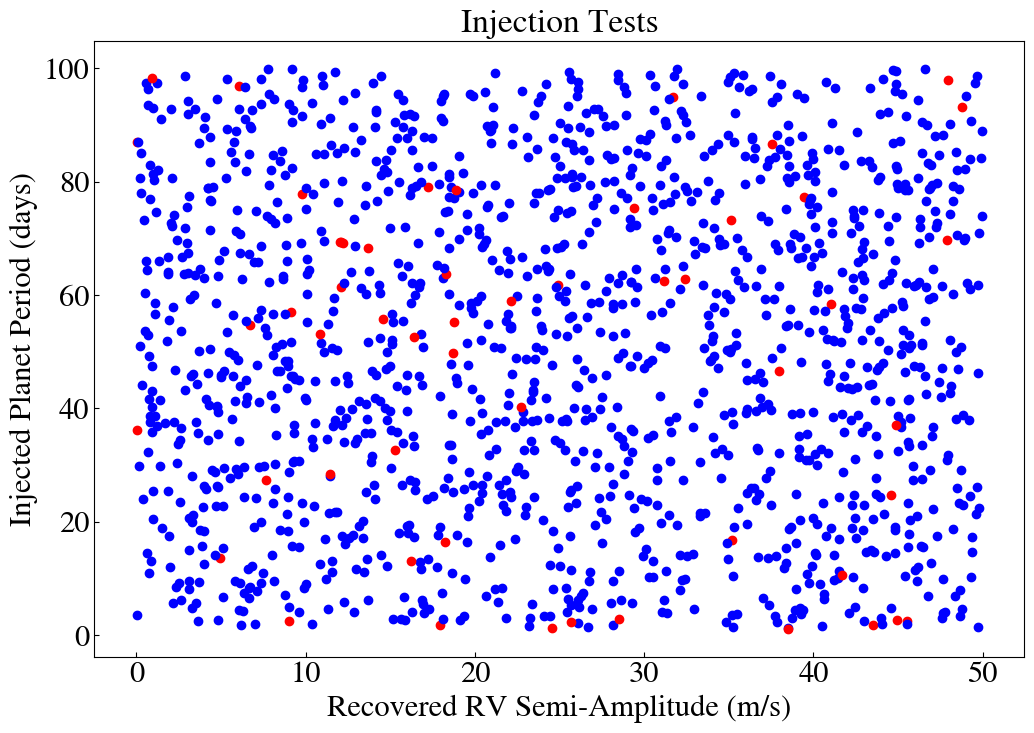

In [7]:
plt.figure(figsize = (12, 8))

for i in range(len(df)):
    if df["Result"].iloc[i] == "Recovered":
        plt.scatter(df["K_b (m/s)"].iloc[i], df["P_c (days)"].iloc[i], color = "blue")

    elif df["Result"].iloc[i] == "Not Recovered":
        plt.scatter(df["K_b (m/s)"].iloc[i], df["P_c (days)"].iloc[i], color = "red")

plt.title("Injection Tests", size = 24)
plt.xlabel("Recovered RV Semi-Amplitude (m/s)", size = 22)
plt.ylabel("Injected Planet Period (days)", size = 22)
plt.tick_params(axis = "both", labelsize = 22)
plt.show()

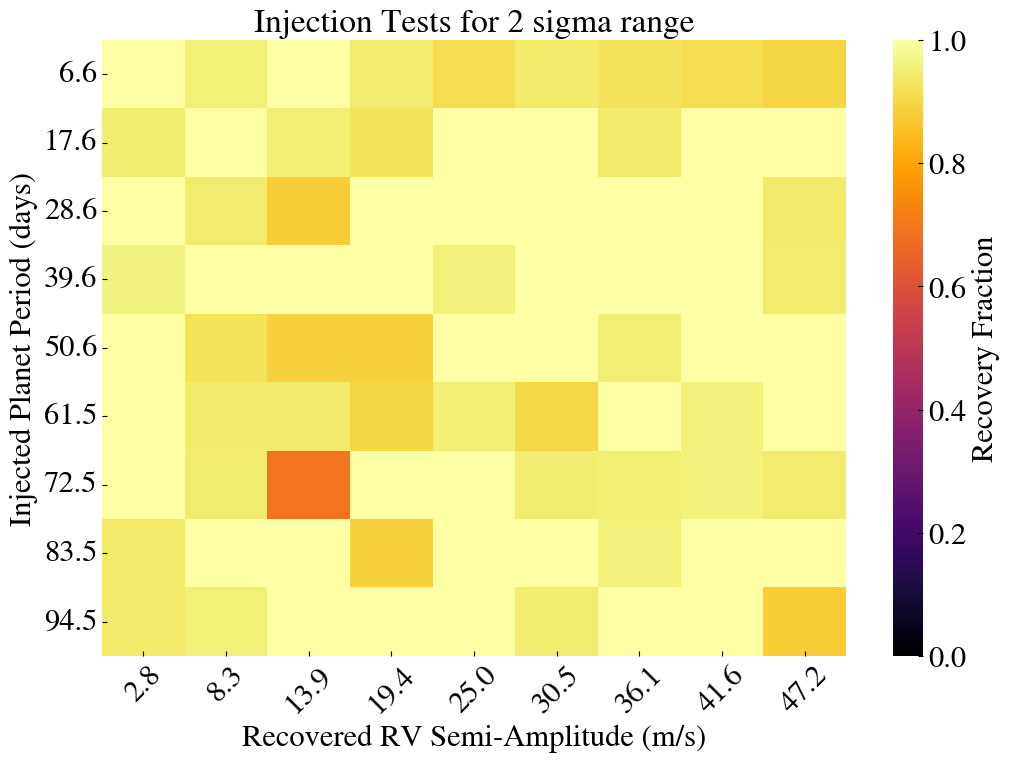

In [8]:
#We first convert the Recovered and Not Recovered into binary values.
df["Recovered"] = df["Result"].map({"Recovered": 1, "Not Recovered": 0})

#We then define the bin edges to sum the recovery results per given interval.
x_bins = np.linspace(df["K_b (m/s)"].min(), df["K_b (m/s)"].max(), 10)
y_bins = np.linspace(df["P_c (days)"].min(), df["P_c (days)"].max(), 10)

#We create a histogram of the recovery fraction.
#For this, first we take the weights as the Recovered and Not Recovered Binaries.
heatmap, x_edges, y_edges = np.histogram2d(df["K_b (m/s)"], df["P_c (days)"], bins = [x_bins, y_bins],
                                           weights = df["Recovered"])

#We also define the number of datapoints in each 2D bin to normalize the heatmap we have obtained.
#Note that we don't need the bin edges for this part, hence the "_".
count, _, _ = np.histogram2d(df["K_b (m/s)"], df["P_c (days)"], bins = [x_bins, y_bins])

#Now we obtain the recovery fraction by division.
#To avoid division with zero, we also look for parts where count is larger than zero.
recovery_fraction = np.divide(heatmap, count, where = (count > 0))

#Finally we calculate the bin centers for plotting purposes.
x_centers = 0.5 * (x_edges[ : -1] + x_edges[1 : ])
y_centers = 0.5 * (y_edges[ : -1] + y_edges[1 : ])

#We create our figure.
plt.figure(figsize=(12, 8))

#We create the heatmap plot.
ax = sns.heatmap(recovery_fraction.T, cmap="inferno", vmin=0, vmax=1,
                 xticklabels=np.round(x_centers, 1), yticklabels=np.round(y_centers, 1))

#We increase tick label sizes for x and y axes
ax.set_xticklabels(ax.get_xticklabels(), fontsize=22)  
ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)  

#We also define the colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)  # Adjust colorbar tick label size
cbar.ax.set_ylabel("Recovery Fraction", size=22)  # Adjust colorbar label size

plt.title("Injection Tests for 2 sigma range", size = 24)
plt.xlabel("Recovered RV Semi-Amplitude (m/s)", size = 22)
plt.ylabel("Injected Planet Period (days)", size = 22)
plt.tick_params(axis = "both", labelsize = 22)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.savefig("toi_2431_injection_test_heat_map.png", dpi = 500, bbox_inches="tight")
plt.show()

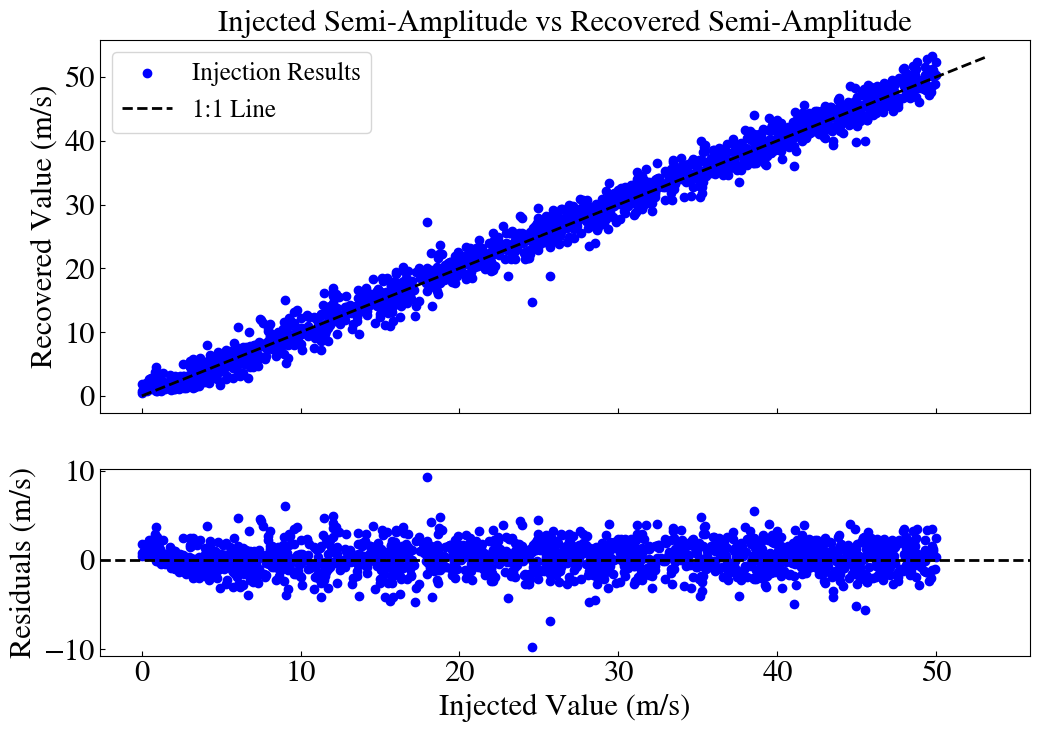

In [9]:
#We also create a plot of the Injected and Recovered RV values to compare them.
#If the test results are well, it should be scattered around the 1:1 line.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

################################################ Injection Results ################################################
ax1.scatter(df["K_truth (m/s)"], df["K_fit (m/s)"], color = "blue", label = "Injection Results")

#We plot the 1:1 line.
min_val = min(df["K_truth (m/s)"].min(), df["K_fit (m/s)"].min())  
max_val = max(df["K_truth (m/s)"].max(), df["K_fit (m/s)"].max())  
ax1.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth = 2, label = "1:1 Line")

ax1.set_title("Injected Semi-Amplitude vs Recovered Semi-Amplitude", fontsize = 22)
ax1.set_ylabel("Recovered Value (m/s)", fontsize = 22)
ax1.tick_params(axis = "both", labelsize = 22)
ax1.legend(fontsize = 18)

############################################### Injection Residuals ###############################################
residuals = df["K_fit (m/s)"] - df["K_truth (m/s)"]
ax2.scatter(df["K_truth (m/s)"], residuals, color = "blue", label = "Residuals")

#We add the horizontal zero-line for the residuals.
ax2.axhline(0, color='k', linestyle='--', linewidth=2)

ax2.set_xlabel("Injected Value (m/s)", fontsize = 22)
ax2.set_ylabel("Residuals (m/s)", fontsize = 22)
ax2.tick_params(axis = "both", labelsize = 22)

plt.savefig("toi_2431_injection_test_comparison.png", dpi = 500, bbox_inches="tight")
plt.show()

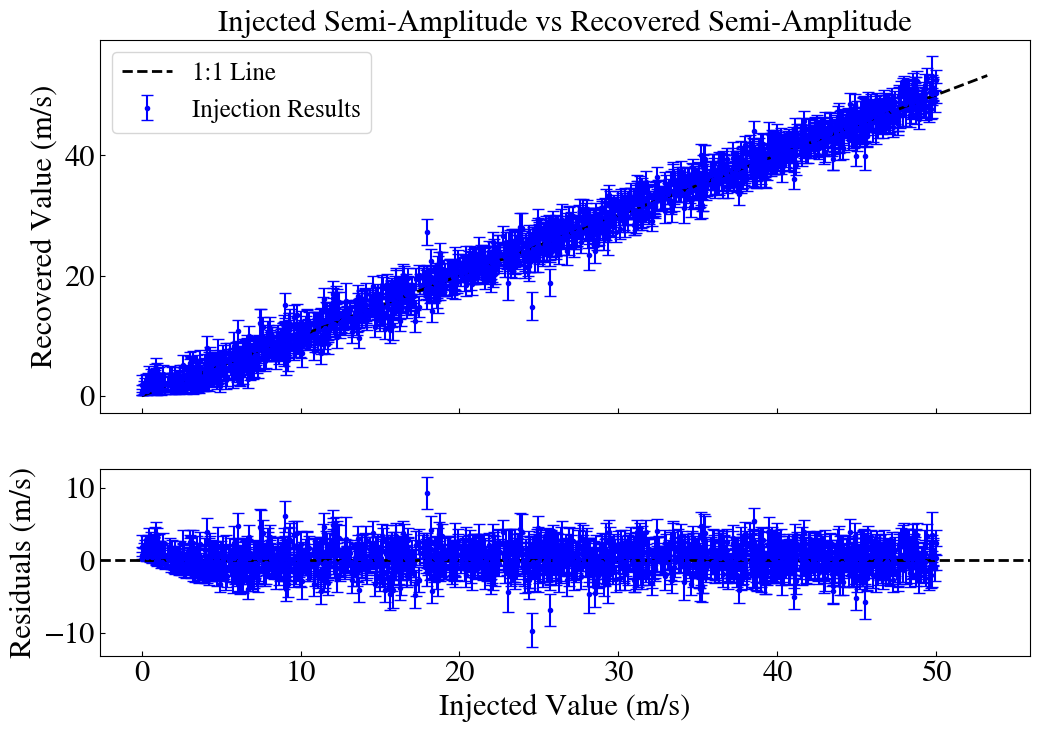

In [10]:
# We create a plot of the Injected and Recovered RV values to compare them.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

################################################ Injection Results ################################################
ax1.errorbar(df["K_truth (m/s)"], df["K_fit (m/s)"], yerr = [df["K_fit Lower Error"], df["K_fit Upper Error"]], 
             fmt='.', color="blue", label="Injection Results", capsize=4)

#We plot the 1:1 line.
min_val = min(df["K_truth (m/s)"].min(), df["K_fit (m/s)"].min())  
max_val = max(df["K_truth (m/s)"].max(), df["K_fit (m/s)"].max())  
ax1.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label="1:1 Line")

ax1.set_title("Injected Semi-Amplitude vs Recovered Semi-Amplitude", fontsize = 22)
ax1.set_ylabel("Recovered Value (m/s)", fontsize=22)
ax1.tick_params(axis="both", labelsize=22)
ax1.legend(fontsize=18)

############################################### Injection Residuals ###############################################
residuals = df["K_fit (m/s)"] - df["K_truth (m/s)"]

ax2.errorbar(df["K_truth (m/s)"], residuals, yerr = [df["K_fit Lower Error"], df["K_fit Upper Error"]], 
             fmt='.', color="blue", label="Residuals", capsize=4)

#We add the horizontal zero-line for the residuals.
ax2.axhline(0, color='k', linestyle='--', linewidth=2)

ax2.set_xlabel("Injected Value (m/s)", fontsize=22)
ax2.set_ylabel("Residuals (m/s)", fontsize=22)
ax2.tick_params(axis="both", labelsize=22)

plt.savefig("toi_2431_injection_test_comparison_w_errors.png", dpi = 500, bbox_inches="tight")
plt.show()